## Installations and Requirements

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

# Imports

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Read Image

### Read image.jpg from the folder (using OpenCV)

In [5]:
image_bgr = cv2.imread(r"image.jpg")

### Convert it to RGB (using OpenCV)

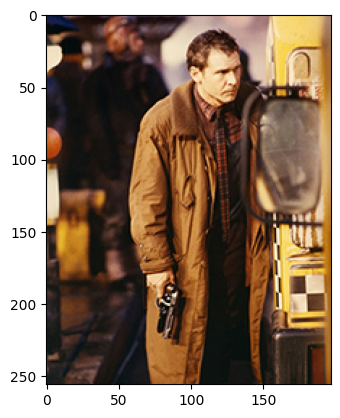

In [6]:
plt.imshow((image := cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)));

# Affine Transformations

## Translation

### Implement & Apply Translation (from scratch without OpenCV)

In [13]:
def translation(image: np.array, x: int, y: int):
    h, w, ch = image.shape
    translated_image = np.zeros_like(image)

    for new_y in range(h):
        for new_x in range(w):
            og_x = new_x - x
            og_y = new_y - y

            if 0 <= og_x < w and 0 <= og_y < h:
                translated_image[new_y, new_x] = image[og_y, og_x]

    return translated_image

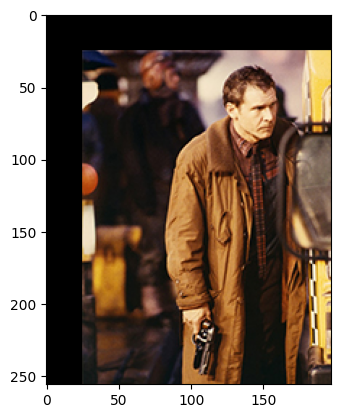

In [14]:
plt.imshow((image_translated_your := translation(image, 25, 25)));

### Implement & Apply Translation (using OpenCV)

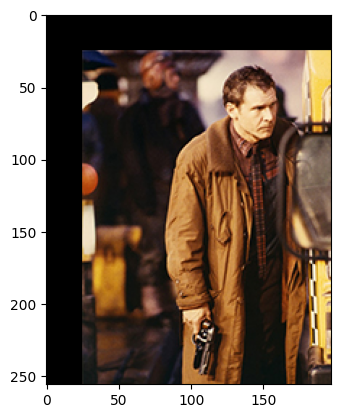

In [15]:
translation_matrix = np.array([[1, 0, 25], [0, 1, 25]]).astype(np.float32)

plt.imshow((image_translated_opencv := cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))));

## Rotation

### Implement & Apply Rotation (from scratch without OpenCV)

In [16]:
import math

def rotation(image: np.array, angle):
    h, w, ch = image.shape
    center_x, center_y = w // 2, h // 2

    rotated_image = np.zeros_like(image)
    radians = math.radians(angle)

    for new_y in range(h):
        for new_x in range(w):
            og_x = int((new_x - center_x) * math.cos(radians) - (new_y - center_y) * math.sin(radians) + center_x)
            og_y = int((new_x - center_x) * math.sin(radians) + (new_y - center_y) * math.cos(radians) + center_y)

            # Check if the original coordinates are within the bounds
            if 0 <= og_x < w and 0 <= og_y < h:
                rotated_image[new_y, new_x] = image[og_y, og_x]

    return rotated_image

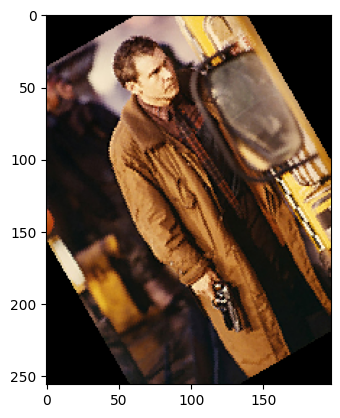

In [20]:
plt.imshow((image_rotated_your := rotation(image, 30)));

### Implement & Apply Rotation (using OpenCV)

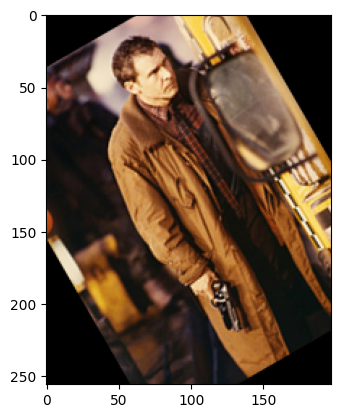

In [22]:
height, width, channels = image.shape
center = (width // 2, height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 30, 1.0)

plt.imshow((image_rotated_opencv := cv2.warpAffine(image, rotation_matrix, (width, height))));

## Identity, Scale, Mirror, Shear

### Implement & Apply Identity, Scale, Mirror, Shear Transformations (using OpenCV)

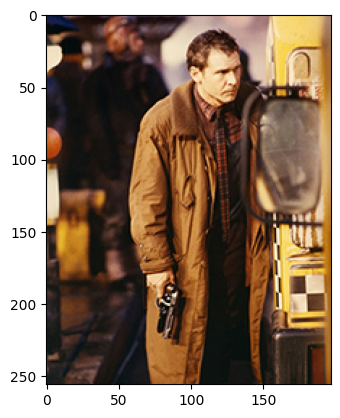

In [24]:
I = np.array([[1, 0, 0], [0, 1, 0]], dtype=np.float32)
scaling_factor_x = 1.5 
scaling_factor_y = 1.5 
scaling_matrix = np.array([[scaling_factor_x, 0, 0], [0, scaling_factor_y, 0]], dtype=np.float32)
mirror_matrix = np.array([[-1, 0, image.shape[1]], [0, 1, 0]], dtype=np.float32)
shearing_factor_x = 0  
shearing_factor_y = 0.5  
shearing_matrix = np.array([[1, shearing_factor_x, 0], [shearing_factor_y, 1, 0]], dtype=np.float32)

plt.imshow((image_identity := cv2.warpAffine(image, I, (image.shape[1], image.shape[0]))));

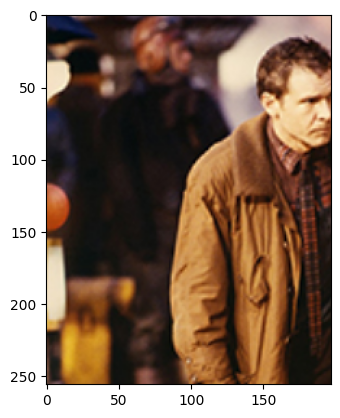

In [27]:
plt.imshow((image_scale := cv2.warpAffine(image, scaling_matrix, (image.shape[1], image.shape[0]))));

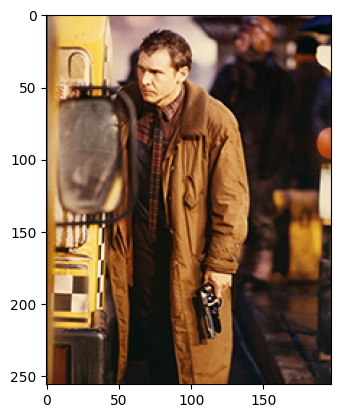

In [28]:
plt.imshow((image_mirror := cv2.warpAffine(image, mirror_matrix, (image.shape[1], image.shape[0]))));

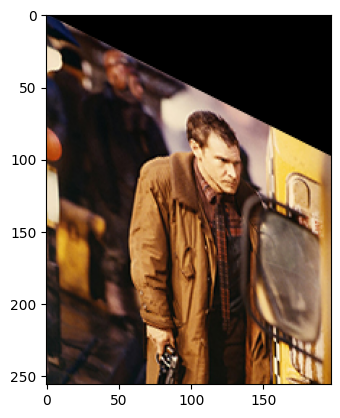

In [30]:
plt.imshow((image_shear := cv2.warpAffine(image, shearing_matrix, (image.shape[1], image.shape[0]))));

# Perspective Transformations

## Affine Transformation

### Implement & Apply Affine Transformation as a subset of Perspective Transformation (using OpenCV)

In [34]:
def perspective_affine_matrix(translation_x, translation_y, scale_x, scale_y, rotation_angle, shear_x, shear_y):
    rotation_angle = math.radians(rotation_angle)

    matrix = np.array([
        [scale_x * math.cos(rotation_angle), scale_x * math.sin(rotation_angle), shear_x],
        [scale_y * -math.sin(rotation_angle), scale_y * math.cos(rotation_angle), shear_y]
    ])

    matrix[0, 2] = translation_x
    matrix[1, 2] = translation_y


    return matrix

In [35]:
matrix = perspective_affine_matrix(20, 20, 1.1, 1.1, 25, 0, 0.1)

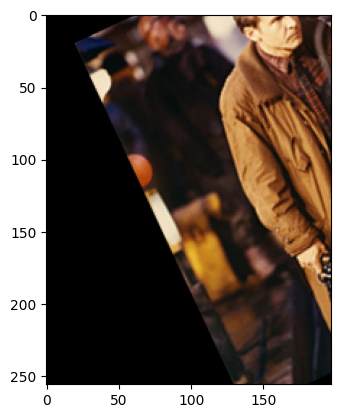

In [36]:
height, width, channels = image.shape

plt.imshow((image_affine := cv2.warpAffine(image, matrix, (width, height))));

### Implement & Apply Perspective Transformation (using OpenCV)

In [39]:
#implement perspective_matrix function usign perspective transformation estimation from two rects (not deformed and deformed rects)

def perspective_matrix(rect, deformed_rect):
    rect = np.array(rect, dtype=np.float32)
    deformed_rect = np.array(deformed_rect, dtype=np.float32)

    perspective_matrix = cv2.getPerspectiveTransform(rect, deformed_rect)

    return perspective_matrix

In [40]:
matrix = perspective_matrix([(0, 0), (image.shape[0], 0), (image.shape[0], image.shape[1]), (0, image.shape[1])],
                            [(30, 30), (image.shape[0] + 30, 30), (image.shape[0] + 30, image.shape[1] + 30), (30, image.shape[1] + 30)])

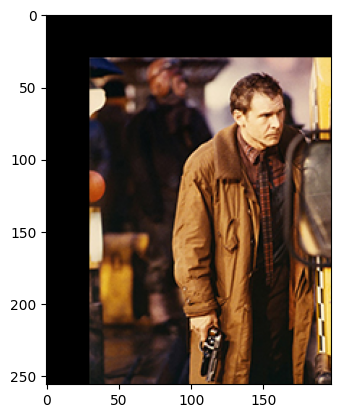

In [43]:
plt.imshow((image_perspective := cv2.warpPerspective(image, matrix, (image.shape[1], image.shape[0]))));

# Warping

### Implement & Apply Warping (using OpenCV)

In [71]:
def warp(image: np.array, u_map: np.array, v_map: np.array):
    height, width, channels = image.shape
    grid_x, grid_y = np.meshgrid(np.arange(width), np.arange(height))

    new_x = (grid_x + u_map).astype(np.float32)
    new_y = (grid_y + v_map).astype(np.float32)

    warped_image = cv2.remap(image, new_x, new_y, interpolation=cv2.INTER_NEAREST)

    return warped_image

### Implement & Apply Identity Warping (using OpenCV)

In [72]:
identity_u_map = np.zeros((height, width), dtype=np.float32)
identity_v_map = np.zeros((height, width), dtype=np.float32)

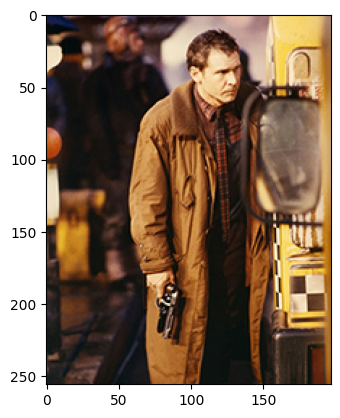

In [73]:
plt.imshow((image_identity := warp(image, identity_u_map, identity_v_map)));

### Implement & Apply Horizontal Mirror Warping (using OpenCV)

In [85]:
def horizontal_mirror_uv_map():
    height, width = image.shape[0], image.shape[1]  # Adjust these dimensions based on your image

    # Create u_map and v_map for horizontal mirror warping
    u_map = np.arange(width - 1, -1, -1).reshape(1, -1).repeat(height, axis=0).astype(np.float32)
    v_map = np.arange(height).reshape(-1, 1).repeat(width, axis=1).astype(np.float32)

    return u_map, v_map

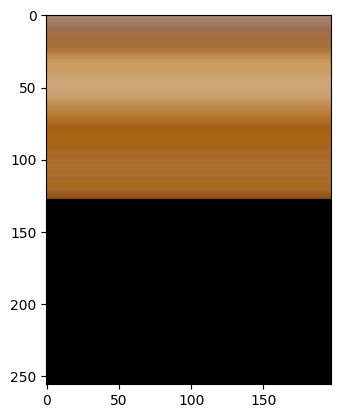

In [86]:
u_map, v_map = horizontal_mirror_uv_map()

plt.imshow((image_mirror_warp := warp(image, u_map, v_map)));